In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Suppress annoying warnings from pandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Data Cleaning

Here we map the names of the animal classes in ```class.csv``` to their corresponding ids in ```zoo.csv```.

In [34]:
animals = pd.read_csv('../data/zoo.csv')
animals.drop(['animal_name'], axis=1, inplace=True) # Not a predictor
animal_names = pd.read_csv('../data/zoo.csv').animal_name

In [3]:
classes = pd.read_csv('../data/class.csv')
classes.columns = [col.lower() for col in classes.columns]
classes = classes[['class_number', 'class_type']].rename({'class_type':'class_name', 'class_number':'class_type'}, axis=1)

In [4]:
animals = animals.merge(classes)

# Hierarchical Clustering of Samples

In [5]:
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [6]:
dummy_legs = pd.get_dummies(animals.legs).loc[:, 1:]
dummy_legs.columns = [str(col) + '_legs'  for col in dummy_legs.columns]
X = animals.drop(['legs', 'class_name', 'class_type'], axis=1).join(dummy_legs)

In [7]:
# generate the linkage matrix
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z, pdist(X))
print(c)

0.804272871574


## Dendrogram

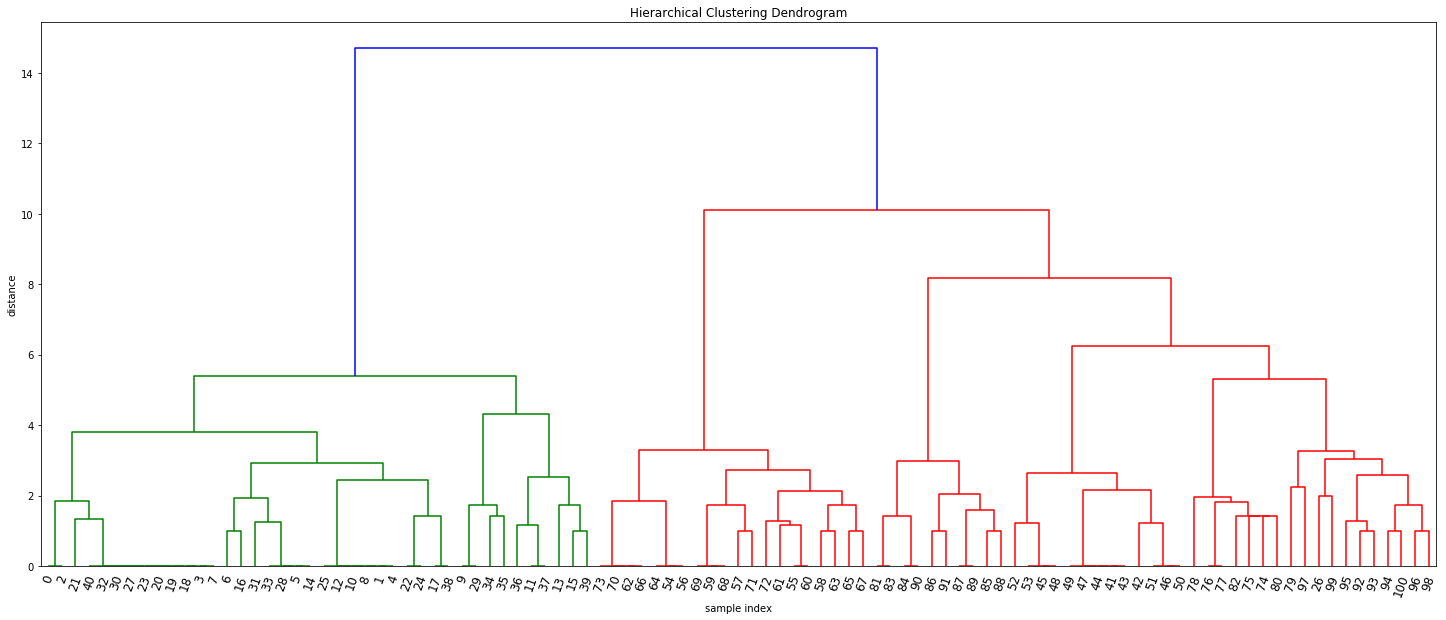

In [8]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=70.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
)
plt.show()

## Truncated Dendrogram

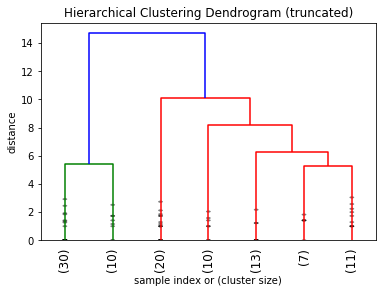

In [9]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=7,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

# Hierarchical Clustering of Variables

In [40]:
from sklearn.cluster import FeatureAgglomeration

features = X.columns.values
fa = FeatureAgglomeration(n_clusters=7).fit(X)

f_clusters = pd.DataFrame(fa.labels_, index=features, columns=['7_clusters'])

In [41]:
features = X.columns.values
fa = FeatureAgglomeration(n_clusters=6).fit(X)

f_clusters = f_clusters.join(pd.DataFrame(fa.labels_, index=features, columns=['6_clusters']))

In [42]:
features = X.columns.values
fa = FeatureAgglomeration(n_clusters=5).fit(X)

f_clusters = f_clusters.join(pd.DataFrame(fa.labels_, index=features, columns=['5_clusters']))

In [43]:
features = X.columns.values
fa = FeatureAgglomeration(n_clusters=4).fit(X)

f_clusters = f_clusters.join(pd.DataFrame(fa.labels_, index=features, columns=['4_clusters']))

In [44]:
features = X.columns.values
fa = FeatureAgglomeration(n_clusters=3).fit(X)

f_clusters = f_clusters.join(pd.DataFrame(fa.labels_, index=features, columns=['3_clusters']))
f_clusters.sort_values(by=f_clusters.columns[0])

,7_clusters,6_clusters,5_clusters,4_clusters,3_clusters
breathes,0,1,1,1,0
tail,0,1,1,1,0
backbone,0,1,1,1,0
toothed,0,1,1,1,0
4_legs,1,3,3,3,0
catsize,1,3,3,3,0
hair,1,3,3,3,0
milk,1,3,3,3,0
6_legs,2,2,2,0,1
venomous,2,2,2,0,1


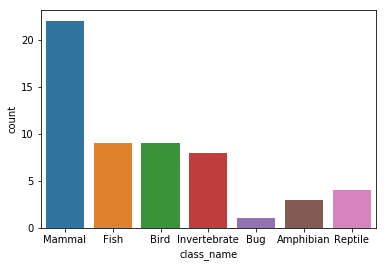

In [30]:
import seaborn as sns

sns.countplot(x='class_name', data=animals[animals.predator == 1])

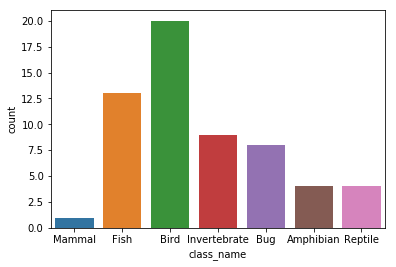

In [33]:
sns.countplot(x='class_name', data=animals[animals.eggs == 1])